# <center><b> Python Programming in Energy Science I</b></center>

## <center> Assignments A1, A2, A3 </center>

### <center>[Group 4]</center>
<center> Juan Manuel Boullosa Novo </center>
<center> Julia Guimaraes Zimmer </center>
<center> Jiah Ryu </center>

-------------------------------

## <center> Assignment A1 </center>
-------------------------------

### E1. Number guessing

Program where user inputs number [0,100] and computer tries to guess it randomly.

In [2]:
from random import randint

def user_input(lower_bound, upper_bound):
    while True:
        n = int(input(f"Enter a number [{lower_bound}-{upper_bound}]: "))
        if lower_bound <= n <= upper_bound:
            return n
        print("Invalid input!")

def guess_number(lower_bound, upper_bound, n):
    guess_counter = 0
    while lower_bound < upper_bound:
        guess_counter += 1
        guess = randint(lower_bound, upper_bound)

        if guess == n:
            print(f"____________________________________________\n{guess_counter}: {guess} is a Match!  [{lower_bound}, {upper_bound}]\n(It took {guess_counter} guesses)")
            return
        elif guess > n:
            result = "too high!"
            upper_bound = guess - 1
        else:
            result = "too low!"
            lower_bound = guess + 1
        print(f"{guess_counter}: {guess} is {result} [{lower_bound}, {upper_bound}]")         
    print(f"Number ranges convergence obtained [{lower_bound}, {lower_bound}]\n____________________________________________\n{guess_counter+1:2}: {lower_bound:2} is a Match! [{lower_bound:2}, {lower_bound:3}]\n(It took {guess_counter+1:2} guesses)") 

lower_bound, upper_bound = 0, 100
n = user_input(lower_bound, upper_bound)
guess_number(lower_bound, upper_bound, n)


1: 75 is too high! [0, 74]
2: 16 is too low! [17, 74]
3: 17 is too low! [18, 74]
4: 20 is too low! [21, 74]
5: 34 is too low! [35, 74]
6: 72 is too high! [35, 71]
7: 67 is too high! [35, 66]
8: 44 is too low! [45, 66]
9: 56 is too low! [57, 66]
10: 57 is too low! [58, 66]
11: 63 is too low! [64, 66]
12: 66 is too high! [64, 65]
____________________________________________
13: 65 is a Match!  [64, 65]
(It took 13 guesses)


### E2. Vector magnitudes

Use a list of classes to store 10 random vectors and find the largest and smallest magnitude. <br>$magnitude = \sqrt{x^2 + y^2 + z^2}$

In [3]:
from numpy.random import randint

class Vector:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
        
    def magnitude(self):
        return (self.x**2 + self.y**2 + self.z**2)**0.5

def check_magnitude(v_list):
    magnitude_list = [vector.magnitude() for vector in v_list]
    max_magnitude, min_magnitude = max(magnitude_list), min(magnitude_list)    
    max_magnitude_index, min_magnitude_index = magnitude_list.index(max_magnitude), magnitude_list.index(min_magnitude)
    max_vector, min_vector = v_list[max_magnitude_index], v_list[min_magnitude_index]
    
    print(f"\nLargest magnitude: {max_magnitude:.2f}, Vector {max_magnitude_index+1}: ({max_vector.x}, {max_vector.y}, {max_vector.z})")
    print(f"Smallest magnitude: {min_magnitude:.2f}, Vector {min_magnitude_index+1}: ({min_vector.x}, {min_vector.y}, {min_vector.z})")

limits, size, v_list = [0,30], 10, []
# Create 10 random vectors
for i in range(size):
    x,y,z = randint(limits[0], limits[1]), randint(limits[0], limits[1]), randint(limits[0], limits[1])
    v_list.append(Vector(x, y, z))    
    print(f"{i+1:2} : Magnitude of ( {v_list[i].x:2} , {v_list[i].y:2} , {v_list[i].z:2} ) is {v_list[i].magnitude():.2f}")

check_magnitude(v_list)

 1 : Magnitude of ( 20 ,  0 , 12 ) is 23.32
 2 : Magnitude of ( 15 , 10 ,  8 ) is 19.72
 3 : Magnitude of (  7 , 28 , 16 ) is 33.00
 4 : Magnitude of ( 24 , 21 ,  7 ) is 32.65
 5 : Magnitude of (  1 , 17 , 10 ) is 19.75
 6 : Magnitude of ( 28 , 27 , 20 ) is 43.74
 7 : Magnitude of ( 13 , 11 , 24 ) is 29.43
 8 : Magnitude of ( 27 , 22 ,  2 ) is 34.89
 9 : Magnitude of ( 15 ,  8 ,  5 ) is 17.72
10 : Magnitude of (  6 , 14 , 21 ) is 25.94

Largest magnitude: 43.74, Vector 6: (28, 27, 20)
Smallest magnitude: 17.72, Vector 9: (15, 8, 5)


### E3. Wind turbine wake

Assuming uniform wind and certain turbine parameters, calculate the reduced wind speed at a certain distances behind the turbine in the wake, following paper's[1] model. Calculate distance at which wind speed is recovered to 8.95 m/s.

$ u(x)=u_0\sqrt{1-\frac{c_t}{8}\left( \frac{D}{\sigma(x)} \right)^{2}},\qquad \sigma(x)=kx+\frac{1}{4}\sqrt{\beta}D,\qquad \beta = \frac{1+\sqrt{1-c_{t}}}{2\sqrt{1-c_t}},\qquad k=0.02$

In [4]:
def wind_speed(u_0, ct, D, sigma):
    # Calculate wind speed at a certain distance behind a turbine based on the wake model equation
    a = 1 - (ct * D ** 2) / (8 * sigma ** 2)
    return u_0 * a ** 0.5

def sigma(k, x, beta, D):
    # Calculate sigma value based on the wake model equation
    return k * x + 0.25 * beta ** 0.5 * D

# Turbine parameters
uniform_wind_speed = 9  # m/s
D = 154  # m
ct = 0.763
k = 0.02
beta = 0.5 * (1 + (1 - ct) ** 0.5) / ((1 - ct) ** 0.5)

# Threshold parameters
threshold = 8.95 # m/s
increment = 1  # m

# Calculate wind speed up to a certain distance behind the turbine when wind speed is below threshold
for x in range(0, int(1e5), increment):
    sigma_value = sigma(k, x, beta, D)
    U = wind_speed(uniform_wind_speed, ct, D, sigma_value)
    
    if U >= threshold:
        print(f"At {x:.2f} m behind the turbine, wind speed is {U:.2f} m/s again.")
        break

At 20213.00 m behind the turbine, wind speed is 8.95 m/s again.


### E4. Geometric series

Function that calculates the $\sum_{k=0}^{N-1}x^k$ and the closed form of the geometric series $\frac{1-x^N}{1-x}$.
<br>Check for differences between the two results and explain why they are different.

In [5]:
def sum_x_k(x, N):
    # Calculate sum x^k for k=0 to k=N-1
    return sum(x**k for k in range(N))

def geo_series(x, N):
    # Calculate closed form of geometric series (1-x^N)/(1-x)
    return N if x == 1 else (1 - x**N) / (1 - x) # Prevent division by zero

def test_methods(test_x, N):
    # Compare two methods for precision over a range of x and N values
    diff_count, diff_sum, trial_num = 0, 0, 0
    for N in range(1, N+1):
        for x in test_x:
            trial_num += 1
            sum_method = sum_x_k(x,N)
            geo_method = geo_series(x,N)
            if sum_method!=geo_method: # Discrepancy between methods
                diff = sum_method - geo_method
                diff_count += 1
                diff_sum += diff # Sum of differences for averaging later
                # Format the output text to 17 decimal places and scientific notation in columns
                print(f"[{trial_num:4}] N={N:2} x={x:4}: [ Summation: {sum_method:.17f}, Geometric series: {geo_method:.17f}]  Difference: {sum_method-geo_method:10.3e}")       
    return diff_count, diff_sum/diff_count, trial_num

test_x = [0.1, 0.25, 0.75, 0.9]
N = 50 # Max value of N to test
diff_count, avg_diff, trial_num = test_methods(test_x, N)
print(f"\nTotal number of differences: {diff_count} / {trial_num} ({diff_count/trial_num * 100}%)")
print(f"Average difference: {avg_diff:.3e}")

[   5] N= 2 x= 0.1: [ Summation: 1.10000000000000009, Geometric series: 1.09999999999999987]  Difference:  2.220e-16
[   9] N= 3 x= 0.1: [ Summation: 1.11000000000000010, Geometric series: 1.10999999999999988]  Difference:  2.220e-16
[  12] N= 3 x= 0.9: [ Summation: 2.70999999999999996, Geometric series: 2.70999999999999952]  Difference:  4.441e-16
[  16] N= 4 x= 0.9: [ Summation: 3.43900000000000006, Geometric series: 3.43900000000000050]  Difference: -4.441e-16
[  28] N= 7 x= 0.9: [ Summation: 5.21703100000000042, Geometric series: 5.21703099999999953]  Difference:  8.882e-16
[  40] N=10 x= 0.9: [ Summation: 6.51321559900000047, Geometric series: 6.51321559900000135]  Difference: -8.882e-16
[  49] N=13 x= 0.1: [ Summation: 1.11111111111100014, Geometric series: 1.11111111111099992]  Difference:  2.220e-16
[  52] N=13 x= 0.9: [ Summation: 7.45813417167100035, Geometric series: 7.45813417167100123]  Difference: -8.882e-16
[  60] N=15 x= 0.9: [ Summation: 7.94108867905351001, Geometric 

The small deviations observed are caused by limited numerical precision in the calculations, which causes rounding errors. This is due to the limited precision of floating-point numbers.

The computation algorithm used is the main cause of these deviations. Specifically, the error comes from the use of the summation formula: $$\sum_{k=0}^{N-1}x^{k}$$ instead of the closed form of the geometric series:$$\frac{1-x^{N}}{1-x}$$

### E5. Graph intersect

Considering two sets of functions, find the intersection points. Then calculate areas of the intersections using the trapezoidal rule. <br><br>
$ f_1(x) = sin(x) $ <br>$ g_1(x) = cos(x) $ <br><br>
$f_2(x) = x^2 + 2x - 5$ <br>$g_2(x) = 2x - 1$

In [6]:
import math

# definitions of sin,cos function, with x in degrees
def sine(x):
    return math.sin(math.radians(x))
def cosine(x):
    return math.cos(math.radians(x))

# second set of functions
def function_1(x):
    return math.pow(x, 2) + 2*x - 5

def function_2(x):
    return 2*x - 1

def find_intersects(function1, function2, range_x_values):
    # returns the intersection point (x,f(x))
    return [(x, function1(x)) for x in range_x_values if abs(function1(x) - function2(x)) < 1e-6]

# prints the results. degrees boolean simply changes output to degrees
def print_intersects(intersections, degrees):
    i = 1
    if degrees:
        print(f"Intersections for sine and cosine functions in the range [0°,360°]:\n")
    else:
        print(f"\nIntersections for quadratic and linear functions in the range [-5,5]:\n")
    
    for x, fx in intersections:
        if degrees:
            print(f"{i}: [{x:3}°, {fx:6.2f}]")
        else:
            print(f"{i}: [{x:3} , {fx:6.2f}]")
        i += 1

# Main program
range_1 = range(0, 361)
intersects_1 = find_intersects(sine, cosine, range_1)
print_intersects(intersects_1, True)

range_2 = range(-5, 6)
intersects_2 = find_intersects(function_1, function_2, range_2)
print_intersects(intersects_2, False)

Intersections for sine and cosine functions in the range [0°,360°]:

1: [ 45°,   0.71]
2: [225°,  -0.71]

Intersections for quadratic and linear functions in the range [-5,5]:

1: [ -2 ,  -5.00]
2: [  2 ,   3.00]


We then calculate the integral under the curves by using the trapezoidal rule.
$$ \int_{a}^{b}f(x)dx≈\frac{b-a}{2}\left[ f(a) +f(b)\right] $$
Where the interval $ [a,b] $ is divided into smaller subintervals and the rule applied at each one of them. The more subintervals used, the closer the approximation to the actual value of the integral.
<br>Therefore the approximation to the integral becomes
$$ \int_{a}^{b}f(x)dx≈\Delta x \left( \frac{f\left( x_N \right) + f\left( x_0 \right) }{2}+\sum_{k=1}^{N-1}f\left( x_k \right) \right) $$ 
where $$ \Delta x=\frac{b-a}{N} $$

In [7]:
def integral_trapezoidal(f, a, b, N):
    # Approximates the integral of the difference between two functions using the trapezoidal rule
    # 
    #   fx: 1st function to integrate
    #   a: lower bound of integration
    #   b: upper bound of integration
    #   N: number of steps to subdivide the interval of integration
    
    dx = float(b - a) / N # step size
    integral = (f(a) + f(b)) * 0.5 # approximation of the integral at the bounds
    
    for i in range(1, N): # loop of the sum of the trapezoidal rule
        u = f(a + i*dx)
        integral += u
    return integral * dx

# define precision of the integral approximation (more steps = more precise)
step_num = 100
area1 = integral_trapezoidal(function_1, intersects_2[0][0], intersects_2[1][0], step_num)
area2 = integral_trapezoidal(function_2, intersects_2[0][0], intersects_2[1][0], step_num)
print(f"\nThe area between f_2(x) and g_2(x) in the range [-5,5] is = {abs(area2 - area1):.2f}")



The area between f_2(x) and g_2(x) in the range [-5,5] is = 10.67


### E6. Linear regression

Perform a linear regression on a cloud of points using Ordinary Least Squares.
<br>Find the coefficients $a$ and $b$ in the function $f(x) = ax + b$
<br> $$ a=\frac{\sum_{i}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i}^{n}(x_i-\bar{x})^2}, \qquad b=\bar{y}-a\bar{x} $$
<br>Explain differences between original function and fitted function. How to get closer to the original function?

In [8]:
def generate_points():
    # Generate cloud of points
    import numpy as np
    x = np.linspace(0, 10, 1000)
    noise = np.random.normal(0, 3, len(x))
    a,b = np.random.randint(1, 5), np.random.randint(-3, 3)
    y = a * x + b + noise
    print(f"Original function: y = {a}x + {b}")
    return x, y

def OLS_coefficients(x, y):
    # Return coefficients a, b using Ordinary Least Squares
    n = len(x)
    x_avg, y_avg = sum(x) / n, sum(y) / n
    a_numerator = sum([(x[i] - x_avg) * (y[i] - y_avg) for i in range(n)])
    a_denominator = sum([(x[i] - x_avg)**2 for i in range(n)])
    a = a_numerator / a_denominator    
    b = y_avg - a * x_avg
    return a, b

[x, y] = generate_points()
[a, b] = OLS_coefficients(x, y)
print(f"OLS function:      y = {a}x + {b}")

Original function: y = 3x + 2
OLS function:      y = 2.9903984375232757x + 2.109182818589842


- The function <b>'generate_points'</b> is used to generate the cloud of points based on the theoretical relationship between 'x' and 'y' in the formula $'f(x) = ax + b'$, using the parameters a and b as random integers from specific ranges and adding a 'noise' generated from a normal distribution. This is made to simulate the real world scenario in which the data does not follow the theoretical relationship.

- The <b>'OLS_coefficients'</b> function is used to calculate the coefficients $'a'$ and $'b'$ of the function by using the Ordinary Least Squares approximation method, minimizing the sum of squared residuals. $'a'$ represents the slope and $'b'$ represents the y-intercept of the best-fit line that minimizes the cost function. This is achieved by minimising the vertical distances between the observed data points and the best-fit line.

$$ J = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 $$

- The <b>original</b> function $'f(x) = ax + b'$ is the theoretical relationship between $'x'$ and $'y'$, and the <b>fitted function</b> $'f(x) = \hat{a}x + \hat{b}'$ is the best linear approximation of the observed data points generated by the 'generate_points' function after using the OSL method.

-------------------------------------------------------

The **OLS method** assumes a linear relationship between the variables, which is correct in this case, but this is an assumption that has to be made in practice. In case of non linearities, a different method such as a polynomial regression can be used.
If the noise levels are too high, or if the number of data points is too small, the OLS method may not be able to accurately represent the relationship between the variables. Therefore several changes can be done to increase the accuracy of this method in order to get closer to the original function:

1. **Increase the number of data points:** by increasing the length of 'x', the accuracy of the OLS method can be improved.

2. **Reduce the noise levels:** by reducing the standard deviation of the gaussian noise generated in the 'generate_points' function, the accuracy of the OLS method can be improved.

3. **Repeat the process iteratively:** averaging the coefficients from multiple runs/datasets. Akin to the **'Monte Carlo simulation method'**, by repeating for a large number of iterations both the generation of points and the calculation of the coefficients, the impact of random noise can be reduced.

4. **Use alternative regression techniques:** Using an alternative fit function, such as a linear regression model, could possibly increase the accuracy of the prediction.

### E7. Christmas tree

Draw a Christmas tree using print automatically with function (input is height of tree in rows).
<br> Adapt function to change width of tree trunk to approximately 1/3 of height.

In [15]:
def draw_tree(height):
    leaf = '*'
    wood = '█'
    trunk_width = height // 3

    for i in range(height - trunk_width):
        spaces = " " * (height - trunk_width - i - 1)
        leaves = leaf * (2 * i + 1)
        print(f"{spaces}{leaves}")
        
    for _ in range(trunk_width):  
        spaces = " " * (i - trunk_width//2)  
        trunk = wood * trunk_width
        print(f"{spaces}{trunk}") 

# Tree parameters
tree_height = 20 #randint(4,30)

draw_tree(tree_height)


             *
            ***
           *****
          *******
         *********
        ***********
       *************
      ***************
     *****************
    *******************
   *********************
  ***********************
 *************************
***************************
          ██████
          ██████
          ██████
          ██████
          ██████
          ██████


-------------------------------
## <center> Assignment A2 </center>
-------------------------------

### E1. Data analysis
- Write a function read_csv(filepath) that reads a file at the given file location into a list of lists.
- Calculate the mean wind vector and its magnitude based on the above mentioned data file.
- Calculate the mean wind speed and its standard deviation. Write your own functions, don’t use libray imports!
- Using the built-in any() and all() functions, check whether all wind speeds are positive (hence no filler values like -999 exist), and whether wind speeds larger than 25 m/s occur.
- Find the minimum and maximum wind speed in this data set.
- In bins of 1 m/s, count how many values fall in each bin between the minimum and maximum wind speed.
-  What is the longest period of time that the wind speed was continuously above a threshold of 10 m/s? Repeat for thresholds of 15 and 25 m/s.

In [16]:
def read_csv(filepath):
    with open(filepath, 'r') as csv:
        next(csv)  # skip header
        data = [line.strip().split(',') for line in csv]
    datestamps_list = [row[0] for row in data]
    wind_speed_vectors_list = [(float(row[1]), float(row[2])) for row in data]
    return datestamps_list, wind_speed_vectors_list

def vector_magnitude(vector):
    return (vector[0] ** 2 + vector[1] ** 2) ** 0.5

def mean_vector(wind_speed_vectors_list):
    list_length = len(wind_speed_vectors_list)
    sum_u100 = sum(row[0] for row in wind_speed_vectors_list)
    sum_v100 = sum(row[1] for row in wind_speed_vectors_list)
    mean_vector = [sum_u100 / list_length, sum_v100 / list_length]
    mean_vector_magnitude = vector_magnitude(mean_vector)
    std_dev = standard_deviation(mean_vector, wind_speed_vectors_list)
    return mean_vector, mean_vector_magnitude, std_dev

def check_wind_speeds(magnitude_list):
    return all(mag > 0 for mag in magnitude_list), any(mag > 25 for mag in magnitude_list)

def find_min_max(magnitude_list):
    return min(magnitude_list), max(magnitude_list)

def standard_deviation(mean_vector, wind_speed_vectors_list):
    squared_differences = [(vector[0] - mean_vector[0]) ** 2 + (vector[1] - mean_vector[1]) ** 2 for vector in wind_speed_vectors_list]
    variance = sum(squared_differences) / len(squared_differences)
    return variance ** 0.5

def time_difference(date1, date2):
    year1, month1, day1, hour1, minute1, second1 = map(int, date1.replace('-', ' ').replace(':', ' ').split())
    year2, month2, day2, hour2, minute2, second2 = map(int, date2.replace('-', ' ').replace(':', ' ').split())
    time1 = second1 + minute1*60 + hour1*3600 + day1*86400 + month1*2592000 + year1*31104000
    time2 = second2 + minute2*60 + hour2*3600 + day2*86400 + month2*2592000 + year2*31104000
    return abs(time2 - time1)

def s_to_hms(seconds):
    hours = seconds // 3600
    minutes = (seconds % 3600) // 60
    seconds = seconds % 60
    return hours, minutes, seconds

def float_range(start, stop, step):
    while start < stop:
        yield start
        start += step
        
def bin_counter(magnitude_list, min_val, max_val, bin_size=1):
    bins = {}
    for bin in float_range(min_val, max_val, bin_size):
        bins[bin] = sum(1 for magnitude in magnitude_list if bin <= magnitude < bin+1)
    return bins

def longest_period_greater_than(datestamps_list, wind_speed_vectors_list, magnitude_list, threshold=10):
    longest_period, current_period = 0, 0
    previous_date = None
    for i in range(len(wind_speed_vectors_list)):
        this_magnitude = magnitude_list[i]
        this_date = datestamps_list[i]
        if this_magnitude >= threshold:
            if previous_date is not None:
                current_period += time_difference(previous_date, this_date)
            previous_date = this_date
        else:
                longest_period = max(longest_period, current_period)
                current_period = 0
    longest_period = s_to_hms(max(longest_period, current_period))
    return longest_period

datestamps_list, wind_speed_vectors_list = read_csv('./A2/winddata.csv')
magnitude_list = [vector_magnitude(vector) for vector in wind_speed_vectors_list]
mean, mean_mag, std = mean_vector(wind_speed_vectors_list)
is_positive, is_over_25 = check_wind_speeds(magnitude_list)
min_val, max_val = find_min_max(magnitude_list)
bins = bin_counter(magnitude_list, min_val, max_val, 1)
longest_period10 = longest_period_greater_than(datestamps_list, wind_speed_vectors_list, magnitude_list, 10)
longest_period15 = longest_period_greater_than(datestamps_list, wind_speed_vectors_list, magnitude_list, 15)
longest_period25 = longest_period_greater_than(datestamps_list, wind_speed_vectors_list, magnitude_list, 25)

# Print results:
print(f'Average wind speed vector: [{mean[0]:.4f}, {mean[1]:.4f}] m/s')
print(f'Mean windspeed: {mean_mag:.4f} m/s')
print(f'Standard deviation: {std:.4f}')
print(f'All wind speeds are positive: {is_positive}')
print(f'Any wind speed is over 25 m/s: {is_over_25}')
print(f'Minimum and maximum wind speeds: [{min_val:.4f} m/s, {max_val:.4f} m/s]')

# Print wind speed bins with format:
print(f'\nCount of wind speeds in bins of size 1 m/s:\n')
print(f'{"Bin [low, high]":<}{"#":>6} \n {"-"*20}')
for this_bin, value in bins.items():
    print(f'[{format(this_bin, ">5.2f")}, {this_bin+1:>5.2f}] -> {value:>3}')

# Print longest periods of wind speed greater than 10, 15 and 25 m/s:
print(f'\nLongest period of wind speed greater than 10 m/s:\n\
    [{longest_period10[0]} hours, {longest_period10[1]} minutes, {longest_period10[2]} seconds]')
print(f'\nLongest period of wind speed greater than 15 m/s:\n\
    [{longest_period15[0]} hours, {longest_period15[1]} minutes, {longest_period15[2]} seconds]')
print(f'\nLongest period of wind speed greater than 25 m/s:\n\
    [{longest_period25[0]} hours, {longest_period25[1]} minutes, {longest_period25[2]} seconds]')

Average wind speed vector: [1.9637, 0.4262] m/s
Mean windspeed: 2.0095 m/s
Standard deviation: 6.3649
All wind speeds are positive: True
Any wind speed is over 25 m/s: False
Minimum and maximum wind speeds: [0.0621 m/s, 23.1355 m/s]

Count of wind speeds in bins of size 1 m/s:

Bin [low, high]     # 
 --------------------
[ 0.06,  1.06] -> 134
[ 1.06,  2.06] -> 408
[ 2.06,  3.06] -> 628
[ 3.06,  4.06] -> 619
[ 4.06,  5.06] -> 616
[ 5.06,  6.06] -> 564
[ 6.06,  7.06] -> 459
[ 7.06,  8.06] -> 399
[ 8.06,  9.06] -> 425
[ 9.06, 10.06] -> 318
[10.06, 11.06] -> 174
[11.06, 12.06] -> 131
[12.06, 13.06] ->  86
[13.06, 14.06] ->  46
[14.06, 15.06] ->  34
[15.06, 16.06] ->  16
[16.06, 17.06] ->   9
[17.06, 18.06] ->   9
[18.06, 19.06] ->   4
[19.06, 20.06] ->   6
[20.06, 21.06] ->   1
[21.06, 22.06] ->   1
[22.06, 23.06] ->   0
[23.06, 24.06] ->   1

Longest period of wind speed greater than 10 m/s:
    [737 hours, 0 minutes, 0 seconds]

Longest period of wind speed greater than 15 m/s:
    [396

### E2. Database
- Create a Python dict, with entries of type dict, that contains the above data, and print it.
- Let the user pick a name, and print the selected person’s data. Throw a KeyError if the name cannot be found.
- Get a color from the user and print all names of persons that have that favourite color. Throw a ValueError if no name is associated with that color.
- Get a minimal and a maximal age, and find all persons within that range. This time print some message if no person could be found (no error).

In [18]:
table = {
    "Julia": {"Age": 3, "Color": "Green"},
    "Jim": {"Age": 32, "Color": "Red"},
    "Marco": {"Age": 16, "Color": "Green"},
    "Denise": {"Age": 23, "Color": "Blue"},
    "Paula": {"Age": 28, "Color": "Red"},
    "Louis": {"Age": 42, "Color": "Yellow"}
}

def get_person_info(table, name):
    if name not in table:
        raise KeyError(f"No person named {name} in the database.")
    return table[name]['Age'], table[name]['Color']

def get_people_by_color(table, color):
    people = [name for name, person in table.items() if person['Color'] == color]
    if not people:
        raise ValueError(f"No person associated with color {color} in the database.")
    return people

def get_people_by_age_range(table, min_age, max_age):
    people = [name for name, person in table.items() if min_age <= person['Age'] <= max_age]
    if not people:
        return (f"No person between {min_age} and {max_age} years old in the database.")
    return people

print("People:",*table) #unpack keys

name = input("Enter name: ")
age, color = get_person_info(table, name)
print(f"\n{name} is {age} years old and likes color {color}")

color = input("Enter color: ")
people = get_people_by_color(table, color)
print(f"\nPeople who like color {color} are:")
print(', '.join(people))

min_age, max_age = map(int, input("Enter min and max age without comma: ").split())
people = get_people_by_age_range(table, min_age, max_age)
print(f"\nPeople between {min_age} and {max_age} years old are:")
print(*people)

People: Julia Jim Marco Denise Paula Louis

Jim is 32 years old and likes color Red

People who like color Red are:
Jim, Paula

People between 20 and 30 years old are:
Denise Paula


### E3. Poetry generator
- Create a dict, with entries subject, verb, object, comment, each associated with a list of strings. Fill the lists
with data that makes sense for the above sentence structure (at least 5 entries for each category). The
comment should finish with a dot, comma, exclamation mark or question mark.
- Write a generator (see lecture 3!) that yields a new random sentence based on the above created dict
every time it is called. Use numpy’s randint function for the random choices (cf. Assignment 1 and its
helper notebook).
- Create a poem with 3 such random sentences (each in its own line), and print it.

In [19]:
from numpy.random import randint

subjects = ["Dog", "Cat", "Bird", "Fish", "Elephant", "Lion", "Tiger", "Bear"]
verbs = ["runs", "jumps", "flies", "swims", "eats", "sleeps", "plays", "sings"]
objects = ["ball", "fish", "mouse", "tree", "leaf", "rock", "stick", "flower"]
comments = ["quickly.", "slowly,", "happily!", "sadly?", "quietly.", "loudly,", "carefully!", "recklessly?"]

sentence_data = {
    "subject": subjects,
    "verb": verbs,
    "object": objects,
    "comment": comments
}

def random_word_generator(list):
    yield list[randint(0, len(list))]

def random_sentence(data):
    subject = random_word_generator(data["subject"])
    verb = random_word_generator(data["verb"])
    object = random_word_generator(data["object"])
    comment = random_word_generator(data["comment"])
    return f"{next(subject)} {next(verb)} {next(object)} {next(comment)}"

for i in range(3):
    print(random_sentence(sentence_data))

Tiger sleeps ball loudly,
Fish swims rock carefully!
Dog sings mouse recklessly?


### E4. Classic phone book
- Write a function that adds a new contact to the phone book. Each contact should have a first name and a
corresponding phone number. The first new is unique and should not be overwritten.
- Write a second function that lists all existing contacts. Only the names should be listed, not the phone
numbers.
- Write a third function that searches for a contact when the name is given. It should then display the phone
number of that person.
- Now initialize an empty phone book and fill it with at least 5 names and phone numbers, using the function
developed above. After entering each new phone number, the program should ask what to do next (hence
which of the functions to call) or whether to quit.

In [20]:
class PhoneBook:
    def __init__(self):
        self.phone_book = {}
        
    def add_contact(self, name, number):
        if name in self.phone_book:
            raise ValueError(f"{name} already exists in the phone book. Please enter a new name.")
        self.phone_book[name] = number
        
    def list_contacts(self):
        if not self.phone_book:
            raise ValueError("The phone book is empty.")
        return "\n".join(f"{name}" for name in self.phone_book.keys())
            
    def get_number(self, name):
        if name not in self.phone_book:
            raise ValueError(f"{name} does not exist in the phone book. Please enter another name.")
        return self.phone_book[name]

phone_book = PhoneBook()
commands = {'add': phone_book.add_contact, 'list': phone_book.list_contacts, 'get': phone_book.get_number}

while True:
        command = input("Enter command (add, list, get, quit): ")
        
        if command == 'quit':
            break
        
        elif command == 'add':
            name = input("Enter name: ")
            number = input("Enter number: ")
            commands[command](name, number)
            
        elif command == 'list':
            print(commands[command]())
            
        elif command == 'get':
            name = input("Enter name: ")
            number = commands[command](name)
            print(f"{name}: {number}")
            
        else:
            print("Invalid command.")

A
B
C
A: 1
B: 2


### E5. String analysis
- Read the provided file holy_grail.txt into a string variable.
- How many lines and, how many words and how many characters are in this text?
- How often do the word python, the word Lancelot and the combination holy grail appear in the text, irrespective of lower/upper case?
- Replace all exclamation and question marks by dots. Then replace the word Python by Cobra in the whole text. Among all sentences, defined by ending with a dot, find those that contain the word Cobra and print them.

In [38]:
def count_lines(text):
    return len(text.splitlines())

def count_words(text):
    return len(text.split())

def count_chars(text):
    return len(text)

def count_occurrences(text, phrase):
    text_lower = text.lower()
    phrase_lower = phrase.lower()
    return text_lower.count(phrase_lower)

def replace_word(text, old_word, new_word):
    return text.replace(old_word, new_word)

def find_sentences(text):
    sentences = text.split('.')
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]
    return sentences

def find_sentences_with_word(text, word):
    sentences = find_sentences(text)
    word_sentences = [sentence for sentence in sentences if word in sentence.split()]
    return word_sentences

wordlist = ["python", "lancelot", "holy grail"]

with open("./A2/holy_grail.txt", "r", encoding='utf-8') as csv: #encoding added to avoid error due to different language setup(unicode)
    text_string = csv.read()
    
    print(f"Numer of lines: {count_lines(text_string)}")
    print(f"Numer of words: {count_words(text_string)}")
    print(f"Numer of characters: {count_chars(text_string)}\n")
    for word in wordlist:
        print(f"Numer of times '{word}' appears: {count_occurrences(text_string, word)}")
    
    changed_text = replace_word(text_string, '?', '.')
    changed_text = replace_word(changed_text, '!', '.')
    new_word = "Cobra"
    changed_text = replace_word(changed_text, "Python", new_word)
    
    cobra_sentences = find_sentences_with_word(changed_text, new_word)
    print(f"\n{len(cobra_sentences)} \'Sentences\' with the word \"{new_word}\":\n")
    print(*cobra_sentences, sep='\n---------------------------------------\n')

Numer of lines: 169
Numer of words: 3436
Numer of characters: 20978

Numer of times 'python' appears: 31
Numer of times 'lancelot' appears: 11
Numer of times 'holy grail' appears: 18

13 'Sentences' with the word "Cobra":

Monty Cobra and the Holy Grail
From Wikipedia, the free encyclopedia
Jump to navigationJump to search
Monty Cobra and the Holy Grail
Monty-Cobra-1975-poster
---------------------------------------
png
British theatrical releases banner
Directed by	
Terry Gilliam
Terry Jones
Produced by	
Mark Forstater
Michael White
Written by	Monty Cobra
Starring	
Graham Chapman
John Cleese
Terry Gilliam
Eric Idle
Terry Jones
Michael Palin
Music by	
Dewolfe
Neil Innes
Cinematography	Terry Bedford
Edited by	John Hackney
Production
companies	
Cobra (Monty) Pictures
Michael White Productions
National Film Trustee Company
Distributed by	EMI Films
Release date	
April 3, 1975 (United Kingdom)
Running time	92 minutes[1]
Country	United Kingdom
Budget	$400,000[2]
Box office	$5 million[2]
Mont

### E6. Fibonacci sequence
- Write a function that prints the Fibonacci sequence of 10 Fibonacci terms.
- Adapt your function such that instead of printing the sequence directly, it returns a list containing the sequence.
- Assume that the Fibonacci sequence you just generated contain the radii of a set of circles. Using the build-in map() function, calculate and print the area of these circles. Use π = 3.1415.
- Instead of using a function, use a generator construction to print the Fibonacci terms. Look at the lecture slides for inspiration.

In [26]:
PI = 3.1415

def fibonacci(n):
    if n <= 1:
        return n
    else:
        return fibonacci(n-1) + fibonacci(n-2)
    
def fibonacci_sequence(n):
    return [fibonacci(i) for i in range(n+1)]

def fibonacci_sequence_generator(n):
    for i in range(n+1):
        yield fibonacci(i)

def circle_area(radius):
    return PI * radius**2

def circle_areas_fibonacci(n):
    # Calculate area for each Fibonacci number
    return map(circle_area, fibonacci_sequence(n))

n = 10
print(f"The first {n} Fibonacci numbers:\n{fibonacci_sequence(n)}\n")
print(f"Area of circles with radii equal to the first {n} Fibonacci numbers are:\
    \n{list(circle_areas_fibonacci(n))}\n")
print(f"Fibonacci numbers up to {n} using a generator function:\
    \n{list(fibonacci_sequence_generator(n))}")

The first 10 Fibonacci numbers:
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

Area of circles with radii equal to the first 10 Fibonacci numbers are:    
[0.0, 3.1415, 3.1415, 12.566, 28.273500000000002, 78.53750000000001, 201.056, 530.9135, 1385.4015000000002, 3631.574, 9503.0375]

Fibonacci numbers up to 10 using a generator function:    
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


-------------------------------
## <center> Assignment A3 </center>
-------------------------------

In [27]:
''' 
Code from exercise
to load the necessary data
'''
import numpy as np
ws100max=np.genfromtxt("./A3/NEWA-WSMAX-100m-30year.csv",delimiter=",")
lill2009newa=np.genfromtxt("./A3/VMM-WRF_D03_LILLGRUND_2009.csv",delimiter=",",skip_header=1)
ws100=lill2009newa[:,3]
ws050=lill2009newa[:,1]
ws150=lill2009newa[:,4]

### E4. Histograms and Weibull Distribution

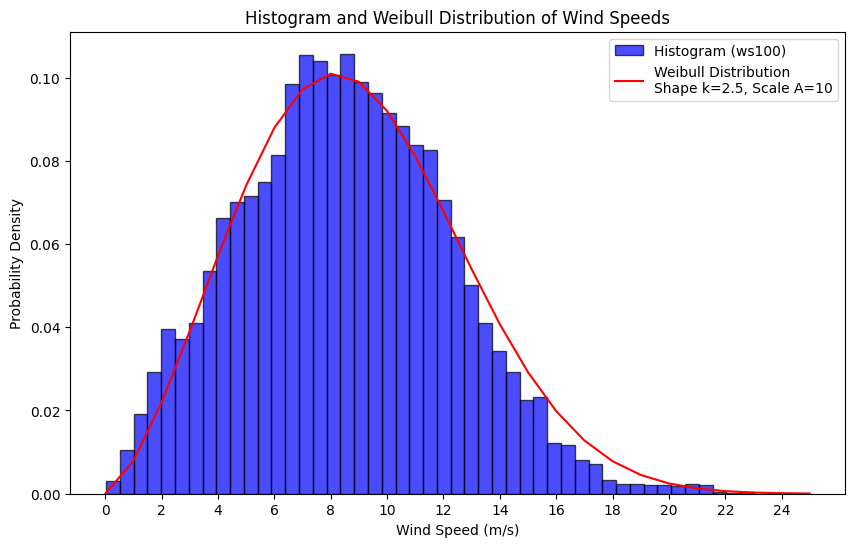

In [28]:
import matplotlib.pyplot as plt
import math # only to use the euler function - otherwise I would need to use a float nr. 

k = 2.5 # shape parameter
A = 10 # scale parameter

def weibull_frequency(A, k, U):
    return (k/A)*(U/A)**(k-1)*(math.exp(-((U / A)**k)))

#create a list with wind speeds 0 - 25 m/s 
horizontal_wind_speeds = []
for i in range(26):
    horizontal_wind_speeds.append(i)

# Compute all weibull frequencies for the given wind speeds
weibull_frequencies = map(weibull_frequency, [A]*len(horizontal_wind_speeds),\
    [k]*len(horizontal_wind_speeds), horizontal_wind_speeds)

############### PLOTTING  ######################
plt.figure(figsize=(10, 6))
# bins: number of bins in the histogram
# density: normalize in such a way that w100 and f_w are comparable so the area under the histogram = 1
# alpha: transparency of the bars
# color: color of the bars
plt.hist(ws100, bins=50, density=True, alpha=0.7, color='blue', label='Histogram (ws100)', edgecolor='black')
# Plot the Weibull Distribution
weibull_freq_list = list(weibull_frequencies)
plt.plot(horizontal_wind_speeds, weibull_freq_list, label=f'Weibull Distribution\nShape k={k}, Scale A={A}', color='red')
# Set x-axis ticks with smaller intervals (2 m/s)
plt.xticks(range(0, 26, 2))
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Probability Density')
plt.title('Histogram and Weibull Distribution of Wind Speeds')
plt.legend()
plt.show()

### E5. Matplotlib gallery

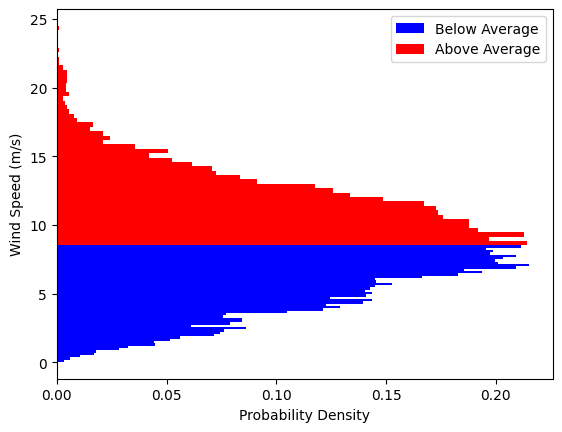

In [29]:
def pyramid_histogram(wind_speeds):
    avg_speed = sum(wind_speeds) / len(wind_speeds)
    below_avg = [speed for speed in wind_speeds if speed <= avg_speed]
    above_avg = [speed for speed in wind_speeds if speed > avg_speed]

    plt.hist(below_avg, bins=50, density=True, orientation='horizontal', histtype='stepfilled', color='b', label='Below Average')
    plt.hist(above_avg, bins=50, density=True, orientation='horizontal', histtype='stepfilled', color='r', label='Above Average')

    plt.ylabel('Wind Speed (m/s)')
    plt.xlabel('Probability Density')
    plt.legend()
    plt.show()

pyramid_histogram(ws100)

### E6. Wind Speed Profile

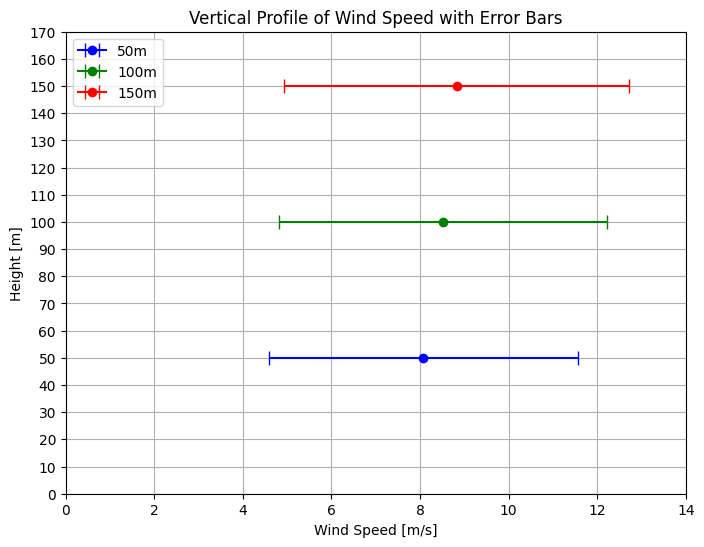

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Heights
heights = [50, 100, 150]


# Calculate mean and standard deviation for each height
mean_ws050, std_ws050, confidenece_range050 = np.mean(ws050), np.std(ws050), np.std(ws050)/len(ws050)
mean_ws100, std_ws100, confidenece_range100 = np.mean(ws100), np.std(ws100), np.std(ws100)/len(ws100)
mean_ws150, std_ws150, confidenece_range150 = np.mean(ws150), np.std(ws150), np.std(ws150)/len(ws150)

# Plotting
plt.figure(figsize=(8, 6))

# Plot vertical profile with error bars
plt.errorbar(mean_ws050, heights[0], xerr=std_ws050, marker='o', label='50m', color='blue', capsize=5)
plt.errorbar(mean_ws100, heights[1], xerr=std_ws100, marker='o', label='100m', color='green', capsize=5)
plt.errorbar(mean_ws150, heights[2], xerr=std_ws150, marker='o', label='150m', color='red', capsize=5)


# Add labels and title
plt.xlabel('Wind Speed [m/s]')
plt.xticks(range(0, 15, 2))
plt.ylabel('Height [m]')
plt.yticks(range(0, 180, 10))
plt.title('Vertical Profile of Wind Speed with Error Bars')
plt.legend()
plt.grid()

# Show the plot
plt.show()


### E7. Plotting of 2D data fields
- Write a function that plots the fields ws100max using at least three different matploltib plotting methods (e.g.imshow, pcolormesh, contour, ....). 
- How do you need to transform the data in the array to let imshow produce the exact same result as pcolormesh? For simplicity you can assume equal axes in pcolormesh. 
- Plot a figure that includes two subplots of imshow and pcolormesh that look the same.

Answer: For imshow, the origin should be set to 'lower' to start the y-axis from the bottom ,and the aspect to 'auto' to fill the subplot size, which are the default behaviors for pcolormesh.

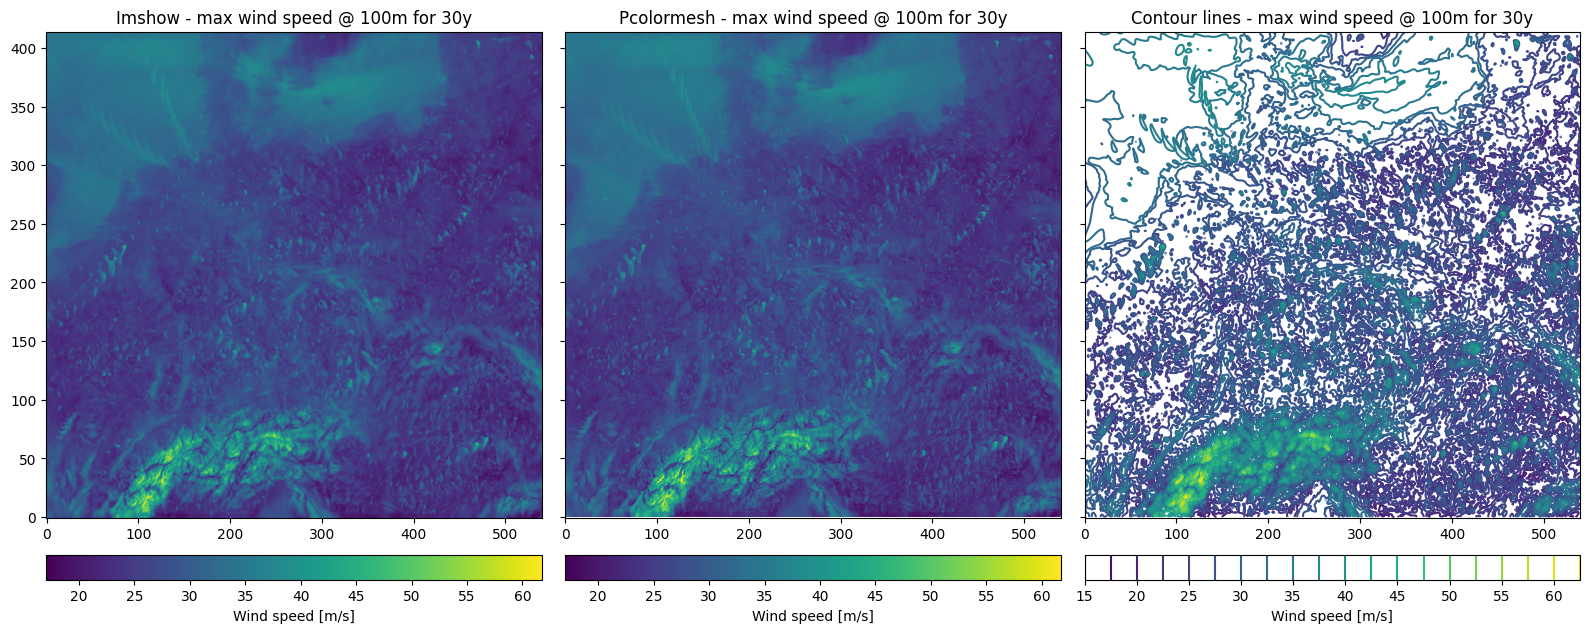

In [39]:
import matplotlib.pyplot as plt

# Function to plot the data
def plot_field(data):
    
    # Create a 3x1 subplot
    fig, ax = plt.subplots(1, 3, figsize=(16, 8),sharey=True)
   
    # First subplot with imshow
    imshow_plot = ax[0].imshow(data, cmap='viridis',origin='lower', aspect='auto') 
    ax[0].set_title('Imshow - max wind speed @ 100m for 30y')
    fig.colorbar(imshow_plot, ax=ax[0], label='Wind speed [m/s]',fraction=0.3, pad=0.05, orientation="horizontal")

    # Second subplot with pcolormesh
    pcolormesh_plot = ax[1].pcolormesh(data, cmap='viridis')
    ax[1].set_title('Pcolormesh - max wind speed @ 100m for 30y')
    fig.colorbar(pcolormesh_plot, ax=ax[1], label='Wind speed [m/s]',fraction=0.3, pad=0.05, orientation="horizontal")

    # Third subplot with contour lines
    contour_plot = ax[2].contour(data,levels=20) #levels to smooth gradient
    ax[2].set_title('Contour lines - max wind speed @ 100m for 30y')
    fig.colorbar(contour_plot,ax=ax[2], label='Wind speed [m/s]',fraction=0.3, pad=0.05, orientation="horizontal")
    
    plt.tight_layout()
    plt.show()

plot_field(ws100max)

### E8. Plotting of 2D data fields

Please combine from the above used examples at least three subfigures into one. You should use at least two
subfigures that have a different width/height combination (This means 3 subplots of 2D data fields of each same
width and height don’t count). Combine the figures in a way that the resulting figure file looks nice. Add labels
(e.g. A,B,C) to the subfigures. The figure should be saved as non-vector graphics (e.g. png) using a reasonable
figure size and quality.

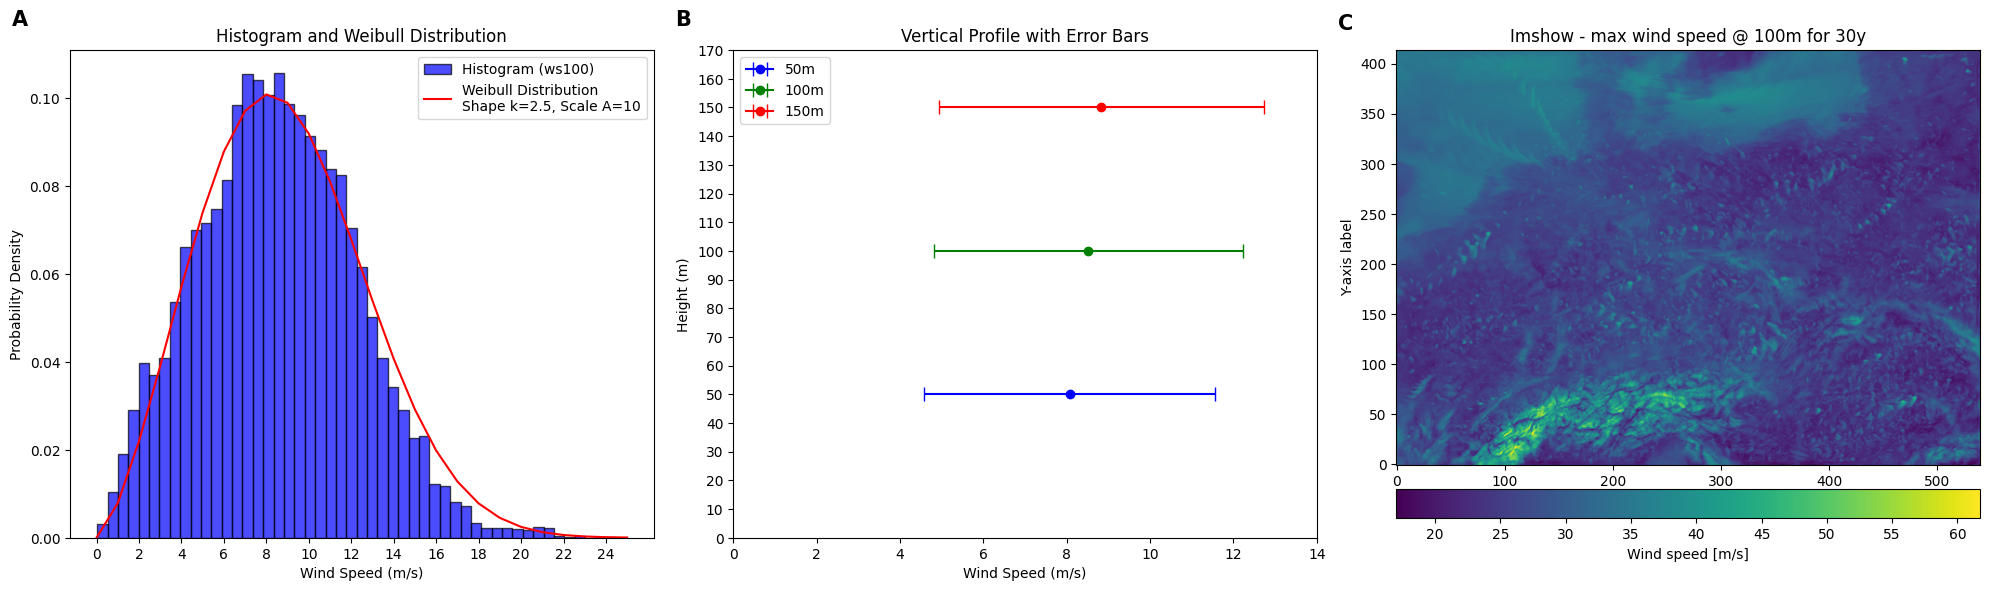

In [35]:
import matplotlib.pyplot as plt

# Create a subplot
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

# Exercise 4
ax[0].hist(ws100, bins=50, density=True, alpha=0.7, color='blue', label='Histogram (ws100)', edgecolor='black')
ax[0].plot(horizontal_wind_speeds, weibull_freq_list, label=f'Weibull Distribution\nShape k={k}, Scale A={A}', color='red')
ax[0].set_xticks(range(0, 26, 2))
ax[0].set_xlabel('Wind Speed (m/s)')
ax[0].set_ylabel('Probability Density')
ax[0].set_title('Histogram and Weibull Distribution')
ax[0].legend()

# Exercise 6
ax[1].errorbar(mean_ws050, heights[0], xerr=std_ws050, marker='o', label='50m', color='blue', capsize=5)
ax[1].errorbar(mean_ws100, heights[1], xerr=std_ws100, marker='o', label='100m', color='green', capsize=5)
ax[1].errorbar(mean_ws150, heights[2], xerr=std_ws150, marker='o', label='150m', color='red', capsize=5)
ax[1].set_xlabel('Wind Speed (m/s)')
ax[1].set_xticks(range(0, 15, 2))
ax[1].set_ylabel('Height (m)')
ax[1].set_yticks(range(0, 180, 10))
ax[1].set_title('Vertical Profile with Error Bars')
ax[1].legend()

# Exercise 7
ax[2].imshow(ws100max, cmap='viridis', origin='lower', aspect='auto') 
ax[2].set_title('Imshow - max wind speed @ 100m for 30y')
ax[2].set_xlabel('X-axis label')  # Add your X-axis label
ax[2].set_ylabel('Y-axis label')  # Add your Y-axis label
fig.colorbar(ax[2].images[0], ax=ax[2], label='Wind speed [m/s]', fraction=0.1, pad=0.05, orientation="horizontal")

# Add labels (A, B, C)
ax[0].text(-0.1, 1.05, 'A', transform=ax[0].transAxes, size=15, weight='bold')
ax[1].text(-0.1, 1.05, 'B', transform=ax[1].transAxes, size=15, weight='bold')
ax[2].text(-0.1, 1.05, 'C', transform=ax[2].transAxes, size=15, weight='bold')

# Adjust layout
plt.tight_layout()

# Save the figure as a non-vector graphic (e.g., png)
plt.savefig('combined_figure.png', dpi=300)

# Show the plot
plt.show()
